# Logistic Regression - *(from scratch)*

In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.special import expit

### What is Logistic fn?
*The logistic function, also called the sigmoid function*

*1 / (1 + e^(-value))*
* *It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.*



*Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.*

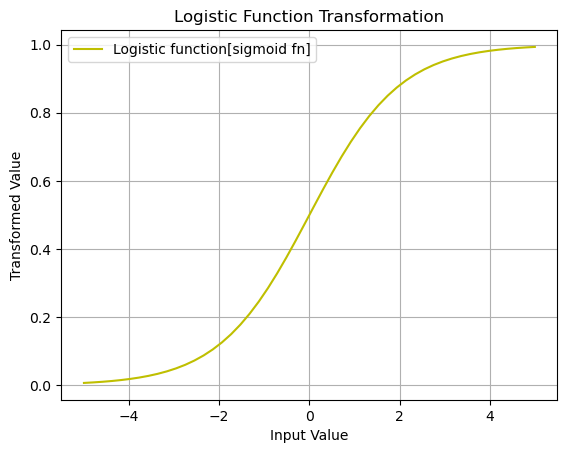

In [40]:
def logistic_fn(value):
    return 1 / (1 + math.e**(-value))

x_val = np.linspace(-5 , 5)
y_val = [logistic_fn(x) for x in x_val]


plt.plot(x_val , y_val ,'y-', label = "Logistic function[sigmoid fn]")
plt.xlabel('Input Value')
plt.ylabel('Transformed Value')
plt.title('Logistic Function Transformation')
plt.grid(True)
plt.legend()
plt.show()



*Alternative*

In [38]:
# from scipy.special import expit
# myx = np.arange(-5,5,.1)
# plt.plot(myx,expit(myx),'y-')
# plt.title("sigmoid function")
# plt.grid(True)

# *Representation Used for Logistic Regression*
* *Logistic regression uses an equation as the representation, very much like linear regression.*

* *Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.*

*Logistic regression equation:* 

*y = e^(b0 + b1 * x) / (1 + e^(b0 + b1 * x))*

# *1. Logistic Regression*

In [66]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex2/data/ex2data1.txt'
cols = np.loadtxt(df , delimiter=','  ,usecols= (0,1,2) , unpack = True)
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m  =X.shape[0]
X = np.insert(X,0,1,axis= 1)
# print(y.shape)
# print(X)


# *1.1 Visualing the data*

In [54]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
nul = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# print(nul)


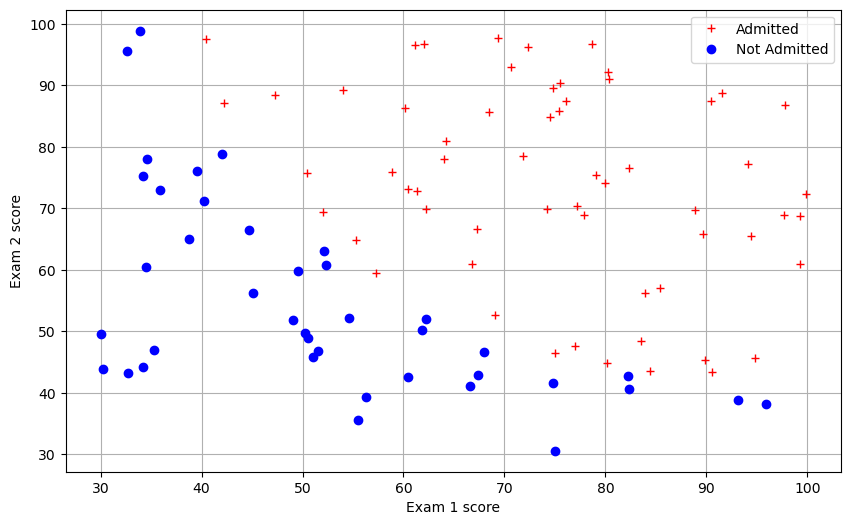

In [25]:
plt.figure(figsize=(10,6))
plt.plot(pos[:,1] , pos[:,2] , 'r+', label = 'Admitted')
plt.plot(nul[:,1]  ,nul[:,2]  ,'bo'  ,label = "Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.grid(True)
plt.legend()
plt.show()

# *Implementation*

### *Hypothesis function and cost function for logistic regression*

In [57]:
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta)) 

def computeCost(mytheta  ,myX , myy , mylambda = 0.):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the initial stage, the default 0. is used for mylambda
    """
    sec1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    sec2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1/m) * (np.sum(sec1 - sec2) + regterm) )

In [58]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))

# print(initial_theta.shape)
computeCost(initial_theta,X,y)

0.6931471805599452

In [59]:

from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [63]:
theta, mincost = optimizeTheta(initial_theta,X,y)
print(theta  ,mincost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143] 0.2034977015902151


In [65]:
print (computeCost(theta,X,y)) #"Calling costFunction function using the optimal parameters of theta.

0.2034977015902151
